In [2]:
import sympy as sp
import sympy.physics.units as u
from IPython.display import Markdown
from sympy import exp as e
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
sp.printing.str.StrPrinter._default_settings['abbrev'] = True

## Units

In [4]:

# DEFINING UNITS TO GLOBAL NAMESPACE
MM = u.millimeters
CM = u.centimeters
M  = u.meters
KM = u.kilometers
IN = u.inches
FT = u.feet
MI = u.miles
YD = u.yards
UM = u.micrometers

MG = u.milligrams
GM = u.grams
KG = u.kilograms
UG = u.micrograms
LBS= u.pounds
MOL = u.moles
MMOL = u.milli * u.moles
MOLAR = u.moles / u.liter

ML = u.milliliters
L  = u.liters
DL = u.deciliters

DAY = u.days
HR = u.hours
MIN= u.minutes
SEC= u.seconds
YR = u.years

MOL = u.mol


def convert (value_and_units,   to):
    """
    ~~~~~~~~~ Convert Units Function ~~~~~~~~~
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    Args:
        >>> valuewUnits      75 * MI/HR
        >>> to                    M/SEC
    ------------------------------------------
    Output                                    -->  Quantity (with new units)
    ==========================================================================
    """

    f = open ("SYMPYUNITS_LOG.txt","a")
    f.write(f'{value_and_units} --->  {sp.N(u.convert_to(value_and_units,to))}\n')
    f.close()
    return Markdown( "$\Large " + sp.latex(sp.N(u.convert_to(value_and_units,to))) + "$")

def printLatex (data):
    return  Markdown( "$\large " +sp.latex(data) + "$")

In [5]:
def solveEq(equation, solvefor):
    """
    |--MARKDOWN DISPLAY FUNCTION--------------------|
    |  SOLVE SYMPY EQUATION, DISPLAYS BOXED ANSWER  |
    |===============================================|
            >>> equation
            >>> solvefor        : symbol
    |===============================================|       
    """
    import sympy as sp
    from IPython.display import Markdown, display

    display(equation)
    display(Markdown("*Solve for " + solvefor._repr_latex_() + ":*"))

    s = sp.solve(equation, solvefor)[0]
    eq = sp.Eq(solvefor, s)

    display(
        Markdown("$~~~~~~~~~~\\boxed{"+eq._repr_latex_().replace("$", "")+"}$"))

    return eq
    # -------------------------------------------------


In [6]:
x , y , z , b, a, c, bt, al, gm, dl         = sp.symbols ("x y z b a c beta alpha gamma delta")
H3O, pH, pOH, OH_                           = sp.symbols("[H_3O^{+}] pH pOH [OH^{-}]")

#### Pythagorean Theorem

In [7]:
PYTHAGOREAN_THEOREM = sp.Eq (a**2 + b**2 ,
                             c**2)
PYTHAGOREAN_THEOREM

Eq(a**2 + b**2, c**2)

In [8]:
bsquared = solveEq(PYTHAGOREAN_THEOREM,b**2) # Solve agebraically for b^2

bsquared = bsquared.subs ({
   a: 45,
   c: 200
})

sp.solve(bsquared, b)[0]   # Solving for b^2       **Note NOT solving for b**

Eq(a**2 + b**2, c**2)

*Solve for $\displaystyle b^{2}$:*

$~~~~~~~~~~\boxed{\displaystyle b^{2} = - a^{2} + c^{2}}$

-35*sqrt(31)

#### pH Equation

In [9]:
H3O_PH_EQUATION = sp.Eq (
   pH,
   - sp.log(H3O)
)
H3O_PH_EQUATION

Eq(pH, -log([H_3O^{+}]))

In [10]:
_PH_ = H3O_PH_EQUATION.subs({
   pH: 2.1
})
solveEq (_PH_, solvefor= H3O)

Eq(2.1, -log([H_3O^{+}]))

*Solve for $\displaystyle [H_3O^{+}]$:*

$~~~~~~~~~~\boxed{\displaystyle [H_3O^{+}] = 0.122456428252982}$

Eq([H_3O^{+}], 0.122456428252982)

## Vancomycin

In [11]:
class VancomycinCalc :
   
   VOL_DIST_VANCOMYCIN = VD = 0.7 # L/kg
   
   ke, CrCl , D, tprime ,tau , Vd, Cmax, Cmin = sp.symbols ("k_e CrCl D t' tau V_d C_{max} C_{min}")
   
   KE_VANCOMYCIN_EQ = sp.Eq (
      ke,
      0.00083 * CrCl + 0.0044
   )
   
   EQ_EST_CMAX = sp.Eq(
      Cmax,
      ((D / tprime)/ (Vd*ke))*((1-e(-ke*tprime))/(1-e(-ke*tau)))
   )
   EQ_EST_CMAX_DESCRIPTION = """
      D     = Dose in mg
      t'    = infusion time in hr
      Tau   = interval in hr
      ke    = Elim. constant
      Vd    = Vol of distribution in L/kg"""
      
      
   EQ_EST_CMIN = sp.Eq (
      Cmin,
      Cmax * e (-ke * (tau - tprime))
   )
   EQ_EST_CMIN_DESCRIPTION = """
      t'    = infusion time in hr
      Tau   = interval in hr
      ke    = Elim. constant
      Cmax  = [Drug]peak in mcg/mL"""


In [12]:
class EQ_EstCmax :
    ke, CrCl , D, tprime ,tau , Vd, Cmax, Cmin = sp.symbols ("k_e CrCl D t' tau V_d C_{max} C_{min}")

    formula = [
        sp.Eq (Cmax,((D / tprime)/ (Vd*ke))*((1-e(-ke*tprime))/(1-e(-ke*tau)))),
        sp.Eq (Cmin, Cmax * sp.exp(-ke * (-tprime + tau)))
    ]
    name = Markdown("#### EQ_EstCmax")
    help = Markdown("Req'd In:     ***CrCl, D, t', $\\tau$, weight***")
    desc = Markdown("""\n- D     = Dose in mg\n- t'    = infusion time in hr\n- $\\tau$   = interval in hr\n- ke    = Elim. constant\n- $V_d$    = Vol of distribution in L/kg""")


    def solve (self, weight, D, CrCl, tprime, tau ):
        """D, CrCl, T', Tau"""
        ke = 0.00083 * CrCl + 0.0044
        eq = self.formula[0].subs({self.ke:ke, self.D:D, self.tprime:tprime, self.tau:tau, self.Vd:0.7*weight})
        display(self.name,self.desc)
        Cmax = float(sp.solve(eq,self.Cmax)[0])
        display (sp.Subs(self.formula[0],(self.ke,self.D,self.tprime,self.tau,self.Vd),(ke,D,tprime,tau,0.7*weight)))
        display(sp.Eq(self.Cmax,sp.solve(eq, EQ_EstCmax.Cmax)[0]))
        display (sp.Subs(self.formula[1],(self.Cmax,self.ke,self.tprime,self.tau),(Cmax,ke,tprime,tau)))
        Cmin = sp.solve(self.formula[1].subs({self.Cmax:Cmax,self.ke:ke,self.tprime:tprime,self.tau:tau}),self.Cmin)[0]
        display(Markdown("$\Large \\boxed {C_{min} = " +  str(Cmin) +"}$"))
        return float(Cmax), float(Cmin)

class EQ_Vd_Vanco :
    ke, CrCl = sp.symbols("k_e CrCl")
    formula = sp.Eq(ke,0.00083 * CrCl + 0.0044)
    help = Markdown("Req'd IN: ***CrCl***")
    @property
    def desc (self):
        display(Markdown("---\n#### Vol of Distr (Vanco)"),self.formula,Markdown("- $k_e$ : Elimination constant\n- $CrCl$ : Creatinine clearance\n\n---"))
    def solve (self, CrCl):
        display(Markdown(f"`INPUT` : $CrCl$: {CrCl}"),Markdown(f"`SOLUTION` : {float(sp.solve(self.formula.subs({self.CrCl:CrCl}),self.ke)[0])}"))
        return ('ke',float(sp.solve(self.formula.subs({self.CrCl:CrCl}),self.ke)[0]))

In [13]:
eqn = EQ_Vd_Vanco() 
eqn.help
eqn.solve(CrCl=45)

Req'd IN: ***CrCl***

`INPUT` : $CrCl$: 45

`SOLUTION` : 0.04175

('ke', 0.04175)

In [15]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt
# %%
def mm(graph,darkmode=1):
  if darkmode == 1:
    graph = "%%{init: {'theme': 'dark'}}%%" + graph
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

In [27]:
graphdata = """

graph TD;
    W{Weight} 
    Cr{CrCl} 
    
    D[Dose]
    Tau[Interval]
    t[Infusion Time]

    W & Cr --> D & Tau & t
    Cr --> Vd
    Vd --> Ke(Ke)

    D & Tau & t & Ke --> Cmax((Cmax))
    Cmax --> Cmin((Cmin))

"""


mm(graphdata)

In [ ]:
eqn = EQ_EstCmax()
eqn.help
eqn.solve(CrCl=79,D=1500,tprime=0.5,tau=12,weight=80)

Req'd In:     ***CrCl, D, t', $\tau$, weight***

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.06997, 1500, 0.5, 12, 56.0))

Eq(C_{max}, 46.3316405365302)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (46.3316405365302, 0.06997, 0.5, 12))

$\Large \boxed {C_{min} = 20.7214647738733}$

(46.3316405365302, 20.7214647738733)

In [ ]:
eqn = EQ_EstCmax()
eqn.formula
cmax = [eqn.solve(D=1500,CrCl=90,tprime=x,tau=12,weight=96)[0] for x in range (1,12)]
cmins = [eqn.solve(D=1500, CrCl=90, tprime=x, tau=12, weight=96)[1] for x in range(1,12)]

[Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))),
 Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau)))]

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 1, 12, 67.2))

Eq(C_{max}, 35.0133921064208)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (35.0133921064208, 0.0791, 1, 12))

$\Large \boxed {C_{min} = 14.6674480492554}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 2, 12, 67.2))

Eq(C_{max}, 33.6819645437739)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (33.6819645437739, 0.0791, 2, 12))

$\Large \boxed {C_{min} = 15.2711055594186}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 3, 12, 67.2))

Eq(C_{max}, 32.4180425553442)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (32.4180425553442, 0.0791, 3, 12))

$\Large \boxed {C_{min} = 15.9078887947343}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 4, 12, 67.2))

Eq(C_{max}, 31.2177756666387)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (31.2177756666387, 0.0791, 4, 12))

$\Large \boxed {C_{min} = 16.5798427523317}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 5, 12, 67.2))

Eq(C_{max}, 30.0775476736563)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (30.0775476736563, 0.0791, 5, 12))

$\Large \boxed {C_{min} = 17.2891470924791}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 6, 12, 67.2))

Eq(C_{max}, 28.9939617955123)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (28.9939617955123, 0.0791, 6, 12))

$\Large \boxed {C_{min} = 18.0381253756394}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 7, 12, 67.2))

Eq(C_{max}, 27.9638267949306)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (27.9638267949306, 0.0791, 7, 12))

$\Large \boxed {C_{min} = 18.8292549512326}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 8, 12, 67.2))

Eq(C_{max}, 26.9841440021979)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (26.9841440021979, 0.0791, 8, 12))

$\Large \boxed {C_{min} = 19.6651775450444}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 9, 12, 67.2))

Eq(C_{max}, 26.052095182523)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (26.052095182523, 0.0791, 9, 12))

$\Large \boxed {C_{min} = 20.5487105956530}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 10, 12, 67.2))

Eq(C_{max}, 25.1650311908073)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (25.1650311908073, 0.0791, 10, 12))

$\Large \boxed {C_{min} = 21.4828593939362}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 11, 12, 67.2))

Eq(C_{max}, 24.320461361605)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (24.320461361605, 0.0791, 11, 12))

$\Large \boxed {C_{min} = 22.4708300836809}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 1, 12, 67.2))

Eq(C_{max}, 35.0133921064208)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (35.0133921064208, 0.0791, 1, 12))

$\Large \boxed {C_{min} = 14.6674480492554}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 2, 12, 67.2))

Eq(C_{max}, 33.6819645437739)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (33.6819645437739, 0.0791, 2, 12))

$\Large \boxed {C_{min} = 15.2711055594186}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 3, 12, 67.2))

Eq(C_{max}, 32.4180425553442)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (32.4180425553442, 0.0791, 3, 12))

$\Large \boxed {C_{min} = 15.9078887947343}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 4, 12, 67.2))

Eq(C_{max}, 31.2177756666387)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (31.2177756666387, 0.0791, 4, 12))

$\Large \boxed {C_{min} = 16.5798427523317}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 5, 12, 67.2))

Eq(C_{max}, 30.0775476736563)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (30.0775476736563, 0.0791, 5, 12))

$\Large \boxed {C_{min} = 17.2891470924791}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 6, 12, 67.2))

Eq(C_{max}, 28.9939617955123)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (28.9939617955123, 0.0791, 6, 12))

$\Large \boxed {C_{min} = 18.0381253756394}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 7, 12, 67.2))

Eq(C_{max}, 27.9638267949306)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (27.9638267949306, 0.0791, 7, 12))

$\Large \boxed {C_{min} = 18.8292549512326}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 8, 12, 67.2))

Eq(C_{max}, 26.9841440021979)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (26.9841440021979, 0.0791, 8, 12))

$\Large \boxed {C_{min} = 19.6651775450444}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 9, 12, 67.2))

Eq(C_{max}, 26.052095182523)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (26.052095182523, 0.0791, 9, 12))

$\Large \boxed {C_{min} = 20.5487105956530}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 10, 12, 67.2))

Eq(C_{max}, 25.1650311908073)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (25.1650311908073, 0.0791, 10, 12))

$\Large \boxed {C_{min} = 21.4828593939362}$

#### EQ_EstCmax


- D     = Dose in mg
- t'    = infusion time in hr
- $\tau$   = interval in hr
- ke    = Elim. constant
- $V_d$    = Vol of distribution in L/kg

Subs(Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau)))), (k_e, D, t', tau, V_d), (0.0791, 1500, 11, 12, 67.2))

Eq(C_{max}, 24.320461361605)

Subs(Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau))), (C_{max}, k_e, t', tau), (24.320461361605, 0.0791, 11, 12))

$\Large \boxed {C_{min} = 22.4708300836809}$

Text(0.5, 1.0, "Vanco $1.5g~q12h$ , differing $t'$")

Text(0, 0.5, '$[Drug]$')

Text(0.5, 0, 'Inf.time ($hr$)')

<AxesSubplot:title={'center':"Vanco $1.5g~q12h$ , differing $t'$"}, xlabel='Inf.time ($hr$)', ylabel='$[Drug]$'>

<AxesSubplot:title={'center':"Vanco $1.5g~q12h$ , differing $t'$"}, xlabel='Inf.time ($hr$)', ylabel='$[Drug]$'>

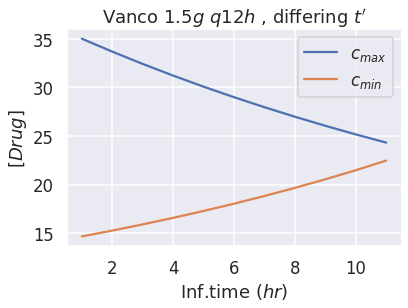

In [ ]:
df = pd.DataFrame(list(zip(range(1,12),cmax,cmins)),columns=["run time","cmax","cmin"])
sns.set_theme('talk',style='darkgrid')
plt.title("Vanco $1.5g~q12h$ , differing $t'$")
plt.ylabel("$[Drug]$")
plt.xlabel("Inf.time ($hr$)")
sns.lineplot(x='run time',y='cmax',data=df)
sns.lineplot(x='run time',y='cmin',data=df)
plt.legend(["$c_{max}$","$c_{min}$"])

In [ ]:
df

,run time,cmin
0,1,14.667448
1,2,15.271106
2,3,15.907889
3,4,16.579843
4,5,17.289147
5,6,18.038125
6,7,18.829255
7,8,19.665178
8,9,20.548711
9,10,21.482859


In [ ]:

EQ = VancomycinCalc()

display("CrCl = 122", EQ.KE_VANCOMYCIN_EQ.subs({EQ.CrCl: 122}))
display(Markdown("---"))
display("CrCl = 33" , EQ.KE_VANCOMYCIN_EQ.subs({EQ.CrCl: 33}))

'CrCl = 122'

Eq(k_e, 0.10566)

---

'CrCl = 33'

Eq(k_e, 0.03179)

In [ ]:
display(EQ.EQ_EST_CMAX)

peak = EQ.EQ_EST_CMAX.subs(
   {
      EQ.D :      1250,
      EQ.tprime : 2,
      EQ.Vd :     56,
      EQ.ke :     0.1165,
      EQ.tau :    8
   }
)
display(peak)

print (EQ.EQ_EST_CMAX_DESCRIPTION)

Eq(C_{max}, D*(1 - exp(-k_e*t'))/(V_d*k_e*t'*(1 - exp(-k_e*tau))))

Eq(C_{max}, 32.8448967862415)


      D     = Dose in mg
      t'    = infusion time in hr
      Tau   = interval in hr
      ke    = Elim. constant
      Vd    = Vol of distribution in L/kg


In [ ]:
EQ.EQ_EST_CMIN

trough = EQ.EQ_EST_CMIN.subs (
   {
      EQ.Cmax : 32.844,
      EQ.ke : 0.1165,
      EQ.tau : 8,
      EQ.tprime : 2
   }
)
trough

print(EQ.EQ_EST_CMIN_DESCRIPTION)

Eq(C_{min}, C_{max}*exp(-k_e*(-t' + tau)))

Eq(C_{min}, 16.3261657230856)


      t'    = infusion time in hr
      Tau   = interval in hr
      ke    = Elim. constant
      Cmax  = [Drug]peak in mcg/mL


## Convert

### VELOCITY

In [ ]:
"100 mi/hr"

convert (
   100 * MI/HR,
   to=   KM/HR
)

'100 mi/hr'

$\Large \frac{160.9344 \text{km}}{\text{hour}}$

In [ ]:
"61 kg"

convert (
   61 * KG,
   LBS
)

'61 kg'

$\Large 134.481979932775 \text{pound}$

In [ ]:
convert (
    5 * MOLAR,
    to= GM / u.mL
)

$\Large \frac{5.0 \text{mol}}{\text{liter}}$